In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to encode baserunners for every pitch
# Runners are assigned bases BEFORE the pitch
# This is necessary to calculate the run expectancy matrix

def baserunners(data):
    
    data['runners_on_1st'] = 0
    data['runners_on_2nd'] = 0
    data['runners_on_3rd'] = 0
    
    for i in range(0, len(data)):

        # New inning means no runners on
        if data['PitchofPA'].iloc[i] == 1 and data['PAofInning'].iloc[i] == 1:
            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]
            continue

        previous_runners = (data['runners_on_1st'].iloc[i-1], data['runners_on_2nd'].iloc[i-1], data['runners_on_3rd'].iloc[i-1])

        previous_first = previous_runners[0]
        previous_second = previous_runners[1]
        previous_third = previous_runners[2]

        previous_outs = data['OutsOnPlay'].iloc[i-1]
        previous_runs = data['RunsScored'].iloc[i-1]
        previous_pitch = data['PitchCall'].iloc[i-1]
        previous_KorBB = data['KorBB'].iloc[i-1]

        # What happens for single?
        # Single GUARANTEES a runner on first at the end of the play
        # All outs will go to the lead runner, unless they scored
        if data['PlayResult'].iloc[i-1] == 'Single':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):
                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]          

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done    
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]     

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                #Runs scored = 0
                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

        elif data['PlayResult'].iloc[i-1] == 'Double':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]    

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                #Runs scored = 0
                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

        elif data['PlayResult'].iloc[i-1] == 'Triple':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 

        elif data['PlayResult'].iloc[i-1] == 'HomeRun':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0] 

        # All Errors have previous_outs = 0
        # Some Errors have previous_runs > 0
        elif data['PlayResult'].iloc[i-1] == 'Error':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]  

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                if previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]    

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]            

        # FieldersChoice can have outs_before = 0 or 1
        # FieldersChoice can have runs_before = 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'FieldersChoice':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]


                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


        # Out means outs_before must be >= 1
        # Out means runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Out':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]           


                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]



            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:


                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


        # outs_before can equal 1 or 2
        # runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Sacrifice': 

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]         

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]             


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]


            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]



            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]



        # Use PitchCall along with following scenarios scenarios
        # RunsScored = 0 AND OutsOnPlay = 0: BallIntentional, Undefined, BallinDirt
        # RunsScored = 0 or 1 AND OutsOnPlay = 0: Ball, HitByPitch, BallCalled
        # RunsScored = 0 AND OutsOnPlay = 0 or 1: StrikeCalled, FoulBall, StrikeSwinging
        # RunsScored = 0 or 1 AND OutsOnPlay = 0 or 1: 



        # Assuming All Walks can only be one run
        # If not a walk then 0 runs scored
        # Does not account for stolen bases
        elif data['PlayResult'].iloc[i-1] == 'Undefined':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]  

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]    


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 


            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0] 

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0] 


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if (previous_KorBB == 'Walk') or (data['PitchCall'].iloc[i-1] == 'HitByPitch'):

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]
    
    # Adds a column that encodes each runner state
    runners_dict = {(0,0,0):0, (1,0,0):1, (0,1,0):2, (1,1,0):3, (0,0,1):4, (1,0,1):5, (0,1,1):6, (1,1,1):7}
    data['runners_code'] = data.apply(
        lambda row: -1 if pd.isnull(row['runners_on_1st']) or pd.isnull(row['runners_on_2nd']) or pd.isnull(row['runners_on_3rd'])
        else runners_dict[(row['runners_on_1st'], row['runners_on_2nd'], row['runners_on_3rd'])], 
        axis=1
    )
                                   
    return

In [3]:
# Function that encodes each count state
def count(data):
    
    count_dict = {(0,2):0, (1,2):1, (0,1):2, (2,2):3, (1,1):4, (0,0):5, 
                  (1,0):6, (2,1):7, (3,2):8, (2,0):9, (3,1):10, (3,0):11}
    data['count_code'] = data.apply(lambda row: count_dict[(row['Balls'], row['Strikes'])], axis=1)
    
    return

In [4]:
# Function that calculates the number of runs scored in an inning after each pitch
# This is needed to calculate the run expectancy matrix
def runs_scored(data):
    
    data['tot_runs_scored'] = None
    runs = 0
    
    for i in range(len(data)-1, -1, -1):
        runs += data['RunsScored'].iloc[i]
        if i == len(data) - 1:
            pass
        elif data['BatterTeam'].iloc[i] != data['BatterTeam'].iloc[i+1]:
            runs = 0
        data.at[i, 'tot_runs_scored'] = runs
            
    return

In [5]:
# Reading in the data
# This is the training data so it should be changed to be the most recent data
# I used a whole year of data but you can adjust it to use more or less
temp = pd.read_csv('2024Data_1.csv', low_memory=False)
temp2 = pd.read_csv('2024Data_2.csv', low_memory=False)
temp3 = pd.read_csv('2024Data_3.csv', low_memory=False)
data = pd.concat([temp, temp2, temp3])

In [6]:
# Fixing some errors in the data
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.loc[data['Outs'] == 3, 'Outs'] = 2
data.loc[(data['Strikes'] == 3) | (data['Strikes'] == 4), 'Strikes'] = 2
data.loc[data['Balls'] == 4, 'Balls'] = 3
data.loc[data['PitchCall'] == 'Inplay', 'PitchCall'] = 'InPlay'
data.loc[data['PitchCall'] == 'InPLay', 'PitchCall'] = 'InPlay'
data.loc[data['PitchCall'] == 'BalIntentional', 'PitchCall'] = 'BallIntentional'
data.loc[data['PitchCall'] == 'ballCalled', 'PitchCall'] = 'BallCalled'
data.loc[data['PitchCall'] == 'BallIntentional', 'PitchCall'] = 'BallCalled'
data.loc[data['PitchCall'] == 'BallinDirt', 'PitchCall'] = 'BallCalled'
data.loc[data['PitchCall'] == 'SrikeCalled', 'PitchCall'] = 'StrikeCalled'
data.loc[data['PitchCall'] == 'StrkeSwinging ', 'PitchCall'] = 'StrikeSwinging'
data.loc[data['PitchCall'] == 'Hitbypitch', 'PitchCall'] = 'HitByPitch'
data.loc[data['PitchCall'] == 'BatterInterference', 'PitchCall'] = 'BattersInterference'
data.loc[data['PitchCall'] == 'CatchersInterfernece', 'PitchCall'] = 'CatchersInterference'
data.loc[data['PitchCall'] == 'FoulBallNotFieldable', 'PitchCall'] = 'FoulBall'
data.loc[data['PitchCall'] == 'FoulBallFieldable', 'PitchCall'] = 'FoulBall'
data.loc[data['PitchCall'] == 'FouldBallNotFieldable', 'PitchCall'] = 'FoulBall'
data.shape[0]

1445211

In [7]:
data['PitchCall'].unique()

array(['InPlay', 'BallCalled', 'StrikeCalled', 'FoulBall',
       'StrikeSwinging', 'HitByPitch', 'Undefined', 'BattersInterference',
       'StriekC'], dtype=object)

In [8]:
# Adding swing/take, baserunners, count, and total runs scored columns
data['Swing/Take'] = 'Take'
data.loc[data['PitchCall'].isin(['StrikeSwinging', 'InPlay', 'FoulBall']), 'Swing/Take'] = 'Swing'
count(data)
baserunners(data)
runs_scored(data)
data.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,Swing/Take,count_code,runners_on_1st,runners_on_2nd,runners_on_3rd,runners_code,tot_runs_scored
0,1,2024-02-16,10:09:21.840000,1,1,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Alvarez, Julian",...,NaN,NaN,NaN,Swing,5,0,0,0,0,0
1,2,2024-02-16,10:09:53.220000,2,1,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,NaN,NaN,NaN,Take,5,0,0,0,0,0
2,3,2024-02-16,10:10:08.560000,2,2,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,NaN,NaN,NaN,Take,6,0,0,0,0,0
3,4,2024-02-16,10:10:24.490000,2,3,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,NaN,NaN,NaN,Take,9,0,0,0,0,0
4,5,2024-02-16,10:10:40.040000,2,4,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,NaN,NaN,NaN,Take,7,0,0,0,0,0


In [9]:
print(data.isnull().sum().to_string())

PitchNo                                 0
Date                                    0
Time                                    0
PAofInning                              0
PitchofPA                               0
Pitcher                                 0
PitcherId                             530
PitcherThrows                           0
PitcherTeam                             0
Batter                               9407
BatterId                              162
BatterSide                             15
BatterTeam                              0
PitcherSet                              0
Inning                                  0
Top_Bottom                              0
Outs                                    0
Balls                                   0
Strikes                                 0
TaggedPitchType                         0
AutoPitchType                       16389
PitchCall                               0
KorBB                                   0
TaggedHitType                     

In [10]:
# Run expectancy matrix
shape = (3, 8, 12)
run_exp_mat = np.full(shape, None, dtype=object)
for i in range(run_exp_mat.shape[0]):
    for j in range(run_exp_mat.shape[1]):
        for k in range(run_exp_mat.shape[2]):
            run_exp_mat[i, j, k] = np.mean(data['tot_runs_scored'][(data['Outs']==i) & 
                                                                   (data['runners_code']==j) & 
                                                                   (data['count_code']==k)])
run_exp_mat = np.array(run_exp_mat, dtype=float)

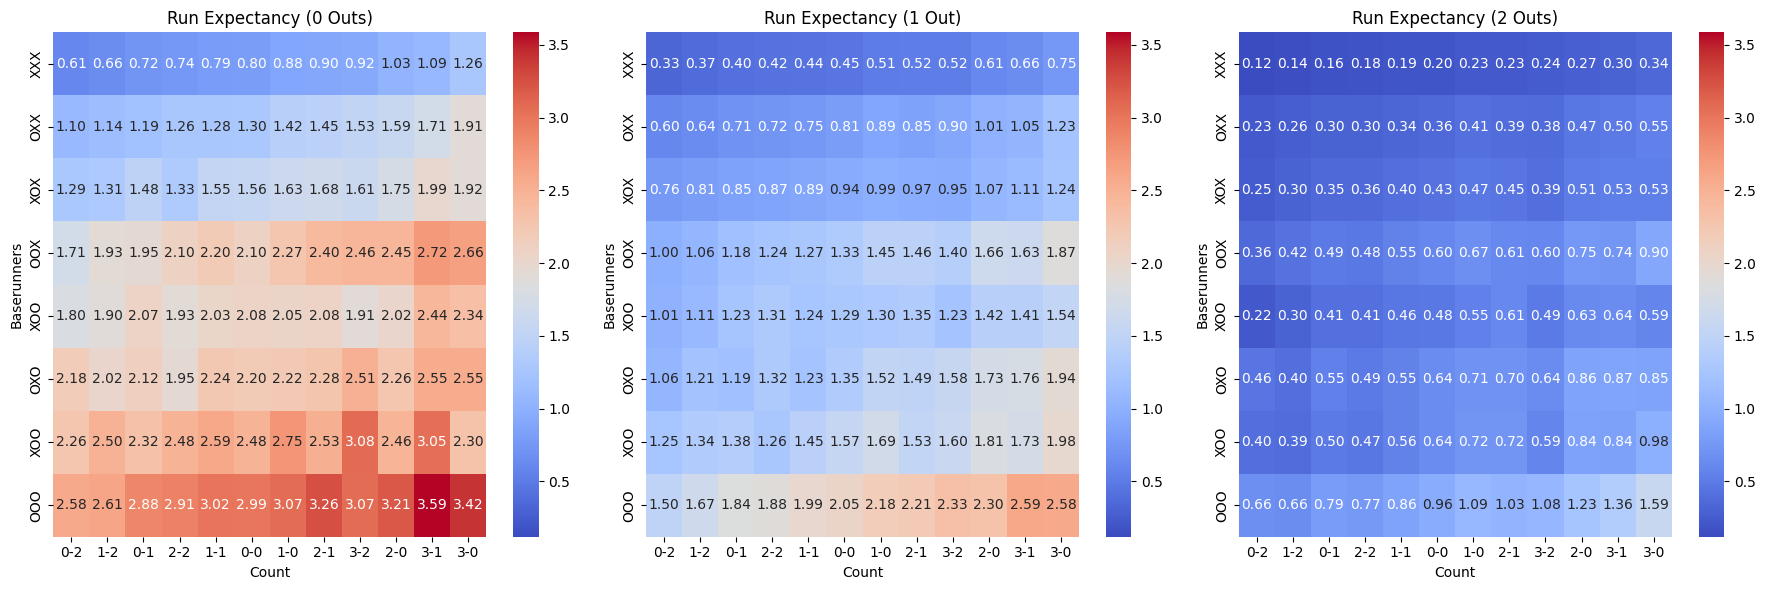

In [11]:
# Column and row labels
row_labels = ['XXX', 'OXX', 'XOX', 'OOX', 'XOO', 'OXO', 'XOO', 'OOO']
col_labels = ['0-2', '1-2', '0-1', '2-2', '1-1', '0-0', '1-0', '2-1', '3-2', '2-0', '3-1', '3-0']

vmin, vmax = run_exp_mat.min(), run_exp_mat.max()

# Create a 1x3 subplot for the three heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each heatmap for outs 0, 1, and 2
for out in range(3):
    sns.heatmap(run_exp_mat[out, :, :], annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=col_labels, yticklabels=row_labels, ax=axes[out], vmin=vmin, vmax=vmax)
    if out == 1:
        axes[out].set_title(f'Run Expectancy ({out} Out)')
    else:
        axes[out].set_title(f'Run Expectancy ({out} Outs)')
    axes[out].set_xlabel('Count')
    axes[out].set_ylabel('Baserunners')

plt.tight_layout()

In [12]:
# Function to calculate the pre pitch, post pitch, and change in expected run value
def exp_run_val(data, mat):

    # Pre pitch expected run value
    data['ERV_pre'] = data.apply(
        lambda row: None if (row['Outs'] == -1 or row['runners_code'] == -1 or row['count_code'] == -1)
        else mat[row['Outs'], row['runners_code'], row['count_code']], 
        axis=1
    )

    # Post pitch expected run value
    data['ERV_post'] = None
    for i in range(len(data)):
        if (i == len(data) - 1) or (data['Outs'].iloc[i] + data['OutsOnPlay'].iloc[i] == 3): 
            data.at[i, 'ERV_post'] = 0
        else:
            data.at[i, 'ERV_post'] = data['ERV_pre'].iloc[i + 1] + data['RunsScored'].iloc[i]
            
    # Change in expected run value
    data['ERV_delta'] = data['ERV_post'] - data['ERV_pre']
    
    return

In [13]:
# Adding ERV columns
exp_run_val(data, run_exp_mat)
data.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,Swing/Take,count_code,runners_on_1st,runners_on_2nd,runners_on_3rd,runners_code,tot_runs_scored,ERV_pre,ERV_post,ERV_delta
0,1,2024-02-16,10:09:21.840000,1,1,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Alvarez, Julian",...,Swing,5,0,0,0,0,0,0.802261,0.453621,-0.348639
1,2,2024-02-16,10:09:53.220000,2,1,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,Take,5,0,0,0,0,0,0.453621,0.506601,0.052979
2,3,2024-02-16,10:10:08.560000,2,2,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,Take,6,0,0,0,0,0,0.506601,0.609489,0.102889
3,4,2024-02-16,10:10:24.490000,2,3,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,Take,9,0,0,0,0,0,0.609489,0.516835,-0.092655
4,5,2024-02-16,10:10:40.040000,2,4,"Scavone, Tommy",1.000299e+09,Right,PEP_WAV,"Ostrander, Garrett",...,Take,7,0,0,0,0,0,0.516835,0.660377,0.143543


# EDA with ERV_delta

In [14]:
import matplotlib.cm as cm

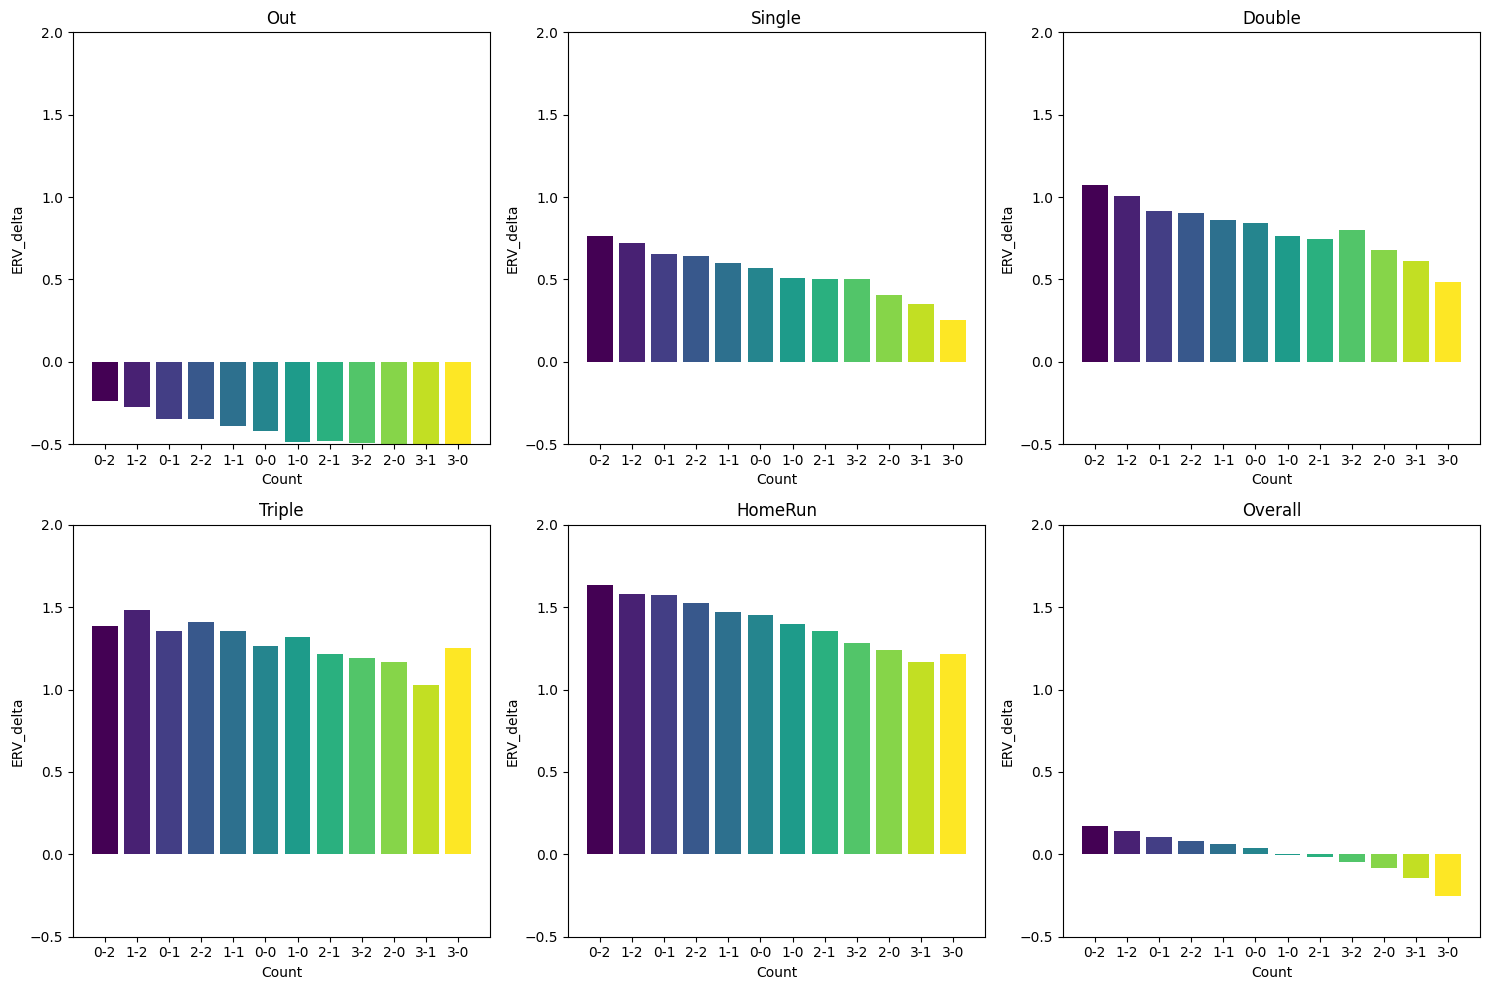

In [15]:
# Average ERV_delta for different in play results
outcomes = ['Out', 'Single', 'Double', 'Triple', 'HomeRun', 'Overall']
counts = ['0-2', '1-2', '0-1', '2-2', '1-1', '0-0', '1-0', '2-1', '3-2', '2-0', '3-1', '3-0']
shape = (6, 12)
result = np.full(shape, None, dtype=object)

for i in range(len(outcomes) - 1):
    for j in range(len(counts)):
        result[i, j] = np.mean(data['ERV_delta'][(data['PlayResult']==outcomes[i]) & 
                                                 (data['count_code']==j)])
for i in range(len(counts)):
    result[5, i] = np.mean(data['ERV_delta'][(data['PlayResult'].isin(outcomes)) &
                                             (data['count_code']==i)])
        
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    colors = cm.viridis(np.linspace(0, 1, len(counts)))
    ax.bar(counts, result[i], color=colors)
    ax.set_title(outcomes[i])
    ax.set_ylim(-0.5, 2)
    ax.set_ylabel('ERV_delta')
    ax.set_xlabel('Count')

plt.tight_layout()

Text(0.5, 1.0, 'Average ERV_delta by Pitch Result')

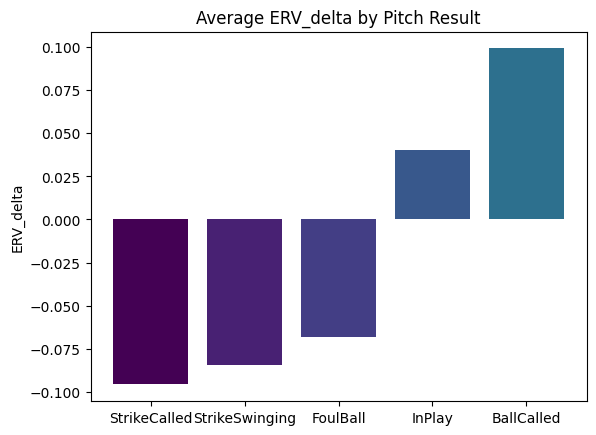

In [16]:
# Average ERV_delta for different play results
pitchcalls = ['StrikeCalled', 'StrikeSwinging', 'FoulBall', 'InPlay', 'BallCalled']
result = np.empty(len(pitchcalls))

for i in range(len(result)):
    result[i] = np.mean(data['ERV_delta'][data['PitchCall']==pitchcalls[i]])

plt.bar(pitchcalls, result, color=colors)
plt.ylabel('ERV_delta')
plt.title('Average ERV_delta by Pitch Result')

In [17]:
# Changing HitByPitch to BallCalled
data['PitchCall_adj'] = data['PitchCall']
data.loc[data['PitchCall_adj']=='HitByPitch', 'PitchCall_adj'] = 'BallCalled'

outcomes = ['BallCalled', 'StrikeCalled', 'InPlay', 'FoulBall', 'StrikeSwinging']
data = data[data['PitchCall_adj'].isin(outcomes)]

In [18]:
data['PitchCall_adj'].unique()

array(['InPlay', 'BallCalled', 'StrikeCalled', 'FoulBall',
       'StrikeSwinging'], dtype=object)

In [19]:
# Target variable (average ERV_delta for play result and count)
data.loc[:, 'target'] = data.groupby(['count_code', 'PitchCall_adj'])['ERV_delta'].transform('mean')

In [20]:
# Cleaned data ready for machine learning
data_cleaned = data[['Date', 'Time', 'Inning', 'PitchNo', 'PAofInning', 'PitchofPA', 'Batter', 'BatterTeam', 
                     'Pitcher', 'PitcherTeam', 'Swing/Take', 'Outs', 'Balls', 'Strikes', 'runners_code', 'count_code',
                     'PitchCall', 'PlayResult', 'TaggedPitchType', 'PlateLocHeight', 'PlateLocSide', 'ERV_delta', 
                     'target']].copy()
colnames = data_cleaned.columns.tolist()
colnames[14] = 'Runners'
colnames[15] = 'Count'
data_cleaned.columns = colnames
data_cleaned.head()

,Date,Time,Inning,PitchNo,PAofInning,PitchofPA,Batter,BatterTeam,Pitcher,PitcherTeam,...,Strikes,Runners,Count,PitchCall,PlayResult,TaggedPitchType,PlateLocHeight,PlateLocSide,ERV_delta,target
0,2024-02-16,10:09:21.840000,1,1,1,1,"Alvarez, Julian",CAL_LAN,"Scavone, Tommy",PEP_WAV,...,0,0,5,InPlay,Out,Fastball,2.30371,-0.09952,-0.348639,0.020706
1,2024-02-16,10:09:53.220000,1,2,2,1,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,...,0,0,5,BallCalled,Undefined,Fastball,2.20297,1.03802,0.052979,0.079671
2,2024-02-16,10:10:08.560000,1,3,2,2,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,...,0,0,6,BallCalled,Undefined,Fastball,1.84496,-2.62468,0.102889,0.115824
3,2024-02-16,10:10:24.490000,1,4,2,3,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,...,0,0,9,StrikeCalled,Undefined,Fastball,2.69952,-0.96273,-0.092655,-0.110529
4,2024-02-16,10:10:40.040000,1,5,2,4,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,...,1,0,7,BallCalled,Undefined,Fastball,1.31319,0.73596,0.143543,0.168174


In [21]:
data_cleaned['target'].isnull().sum()

np.int64(0)

In [22]:
data_cleaned.to_csv('data_cleaned.csv', index=False)